In [ ]:
from tensorflow import keras 
from keras.layers import Dense,Flatten,Dropout
from keras.models import Model, Sequential,load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.optimizers import Adam

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,shear_range=.2,rotation_range=.2)
valid_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/",
                                               target_size=(224,224),class_mode="categorical",batch_size=32,shuffle=True)
valid_set=valid_datagen.flow_from_directory("/content/drive/MyDrive/Final_Project_CS331/Dataset/Val/",
                                          target_size=(224,224),batch_size=32,class_mode="categorical",shuffle=True)
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/Final_Project_CS331/Dataset/Test/",
                                          target_size=(224,224),batch_size=32,class_mode="categorical",shuffle=True)

Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
model=VGG16(include_top=False,weights="imagenet",input_shape=[224,224,3])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
folder=glob("/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/*")
folder

['/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Early_blight',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___healthy',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Late_blight',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Final_Project_CS331/Dataset/Train/Tomato___Target_Spot']

In [ ]:
x=Flatten()(model.output)
pred_vgg16=Dense(units=len(folder),activation="softmax")(x)
vgg16_model=Model(inputs=model.input,outputs=pred_vgg16)

In [ ]:
x=Flatten()(model.output)
#x = Flatten(name='flatten')(x)

# Thêm FC
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer với softmax activation
x = Dense(10, activation='softmax')(x)
vgg16_model=Model(inputs=model.input,outputs=x)

In [ ]:
for layer in model.layers:
  layer.trainable=False

In [ ]:
INIT_LR = 0.0001
opt = Adam(lr=INIT_LR, decay=INIT_LR / 32)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
vgg16_model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

#### Final Architecture

In [ ]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode = 'auto')

In [ ]:
transfer_vgg16=vgg16_model.fit(training_set,validation_data=valid_set,epochs=25,
                                         validation_steps=len(valid_set),steps_per_epoch=len(training_set))

Epoch 1/25
250/250 [==============================] - 2982s 12s/step - loss: 1.3224 - accuracy: 0.5659 - val_loss: 0.7887 - val_accuracy: 0.7740
Epoch 2/25
250/250 [==============================] - 114s 455ms/step - loss: 0.8020 - accuracy: 0.7458 - val_loss: 0.6059 - val_accuracy: 0.8180
Epoch 3/25
250/250 [==============================] - 116s 463ms/step - loss: 0.6571 - accuracy: 0.7875 - val_loss: 0.5217 - val_accuracy: 0.8425
Epoch 4/25
250/250 [==============================] - 113s 453ms/step - loss: 0.5647 - accuracy: 0.8204 - val_loss: 0.4282 - val_accuracy: 0.8675
Epoch 5/25
250/250 [==============================] - 114s 454ms/step - loss: 0.4905 - accuracy: 0.8438 - val_loss: 0.4201 - val_accuracy: 0.8670
Epoch 6/25
250/250 [==============================] - 115s 460ms/step - loss: 0.4312 - accuracy: 0.8622 - val_loss: 0.3673 - val_accuracy: 0.8855
Epoch 7/25
250/250 [==============================] - 112s 449ms/step - loss: 0.3862 - accuracy: 0.8783 - val_loss: 0.3451 - 

In [ ]:
for layer in model.layers[15:]:
  layer.trainable=True

In [ ]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
transfer_vgg16=vgg16_model.fit(training_set,validation_data=valid_set,epochs=35,
                                         validation_steps=len(valid_set),steps_per_epoch=len(training_set))

Epoch 1/35
250/250 [==============================] - 117s 465ms/step - loss: 0.1101 - accuracy: 0.9669 - val_loss: 0.2474 - val_accuracy: 0.9140
Epoch 2/35
250/250 [==============================] - 113s 451ms/step - loss: 0.1073 - accuracy: 0.9690 - val_loss: 0.2228 - val_accuracy: 0.9220
Epoch 3/35
250/250 [==============================] - 114s 456ms/step - loss: 0.1037 - accuracy: 0.9686 - val_loss: 0.2372 - val_accuracy: 0.9160
Epoch 4/35
250/250 [==============================] - 113s 450ms/step - loss: 0.0923 - accuracy: 0.9751 - val_loss: 0.2522 - val_accuracy: 0.9125
Epoch 5/35
250/250 [==============================] - 113s 451ms/step - loss: 0.0909 - accuracy: 0.9751 - val_loss: 0.2337 - val_accuracy: 0.9185
Epoch 6/35
250/250 [==============================] - 115s 459ms/step - loss: 0.0835 - accuracy: 0.9776 - val_loss: 0.2388 - val_accuracy: 0.9195
Epoch 7/35
250/250 [==============================] - 113s 451ms/step - loss: 0.0766 - accuracy: 0.9795 - val_loss: 0.2220 -

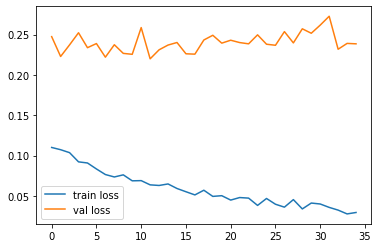

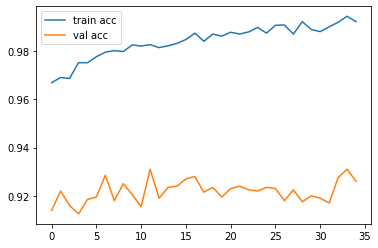

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='train acc')
plt.plot(transfer_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
vgg16_model.save("/content/drive/MyDrive/Final_Project_CS331/vgg16_2.h5")
from keras.models import load_model
modelvgg16=load_model("/content/drive/MyDrive/Final_Project_CS331/vgg16_2.h5")

In [ ]:
y_pred_vgg16=modelvgg16.predict(test_set)

32/32 [==============================] - 5s 144ms/step


In [ ]:
results = modelvgg16.evaluate(valid_set)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

63/63 [==============================] - 10s 150ms/step - loss: 0.3965 - accuracy: 0.8875
    Test Loss: 0.39653
Test Accuracy: 88.75%


In [ ]:
results = modelvgg16.evaluate(test_set)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

32/32 [==============================] - 286s 9s/step - loss: 0.4947 - accuracy: 0.8760
    Test Loss: 0.49473
Test Accuracy: 87.60%


In [ ]:
import numpy as np
y_pred_vgg16=np.argmax(y_pred_vgg16,axis=1)

In [ ]:
import math
number_of_examples = len(test_set.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * 32)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
  print(i)
  test_labels.extend(np.array(test_set[i][1]))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


In [ ]:
#test_labels = np.array(test_labels)
test_labels = np.argmax(test_labels,axis=1)
test_labels

array([9, 4, 4, 1, 4, 6, 9, 2, 4, 0, 6, 5, 0, 6, 2, 5, 6, 7, 7, 1, 2, 3,
       9, 1, 4, 3, 8, 3, 8, 6, 9, 5, 8, 2, 0, 5, 9, 4, 1, 5, 2, 5, 9, 9,
       5, 2, 1, 6, 4, 6, 5, 1, 8, 3, 5, 8, 7, 6, 3, 2, 1, 1, 9, 0, 7, 4,
       8, 5, 4, 9, 3, 9, 4, 7, 8, 2, 6, 9, 9, 2, 3, 5, 3, 4, 6, 3, 0, 9,
       1, 4, 2, 4, 8, 1, 5, 5, 8, 5, 6, 2, 5, 0, 2, 0, 1, 5, 7, 7, 4, 0,
       5, 2, 0, 7, 7, 0, 8, 5, 7, 4, 3, 1, 6, 0, 6, 1, 1, 8, 1, 6, 0, 9,
       7, 1, 0, 3, 6, 9, 9, 0, 1, 5, 3, 9, 3, 3, 7, 4, 2, 1, 4, 2, 2, 8,
       7, 3, 0, 4, 0, 9, 2, 3, 0, 0, 6, 7, 2, 6, 4, 8, 3, 4, 7, 2, 8, 6,
       3, 6, 9, 9, 2, 9, 8, 6, 2, 7, 5, 8, 1, 0, 5, 7, 2, 2, 3, 1, 8, 1,
       5, 7, 4, 9, 8, 1, 7, 0, 7, 0, 4, 1, 5, 6, 9, 3, 9, 1, 3, 6, 2, 1,
       8, 7, 5, 2, 0, 4, 4, 9, 8, 4, 1, 0, 5, 8, 0, 9, 1, 3, 7, 9, 4, 6,
       4, 4, 4, 4, 0, 5, 6, 2, 0, 3, 3, 8, 5, 3, 2, 4, 3, 7, 2, 1, 0, 7,
       7, 0, 7, 3, 3, 1, 7, 1, 6, 3, 5, 4, 6, 7, 8, 2, 9, 2, 4, 8, 3, 4,
       2, 0, 2, 2, 0, 9, 2, 7, 1, 6, 7, 6, 8, 8, 3,

In [ ]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
test_labels_name = [labels[k] for k in test_labels]

In [ ]:
y_pred_vgg16=modelvgg16.predict(test_set)

32/32 [==============================] - 5s 145ms/step


In [ ]:
y_pred_vgg16 = np.argmax(y_pred_vgg16, axis = 1)
y_pred_vgg16_name = [labels[k] for k in y_pred_vgg16]
from sklearn.metrics import classification_report
print(classification_report(test_labels_name, y_pred_vgg16_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.97      0.93      0.95       100
                        Tomato___Early_blight       0.73      0.83      0.78       100
                         Tomato___Late_blight       0.85      0.86      0.86       100
                           Tomato___Leaf_Mold       0.92      0.84      0.88       100
                  Tomato___Septoria_leaf_spot       0.85      0.88      0.86       100
Tomato___Spider_mites Two-spotted_spider_mite       0.83      0.85      0.84       100
                         Tomato___Target_Spot       0.91      0.72      0.80       100
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.94      0.96       100
                 Tomato___Tomato_mosaic_virus       0.80      0.98      0.88       100
                             Tomato___healthy       0.97      0.93      0.95       100

                                     accu

[[93  2  2  0  3  0  0  0  0  0]
 [ 0 83  5  1  4  4  0  0  3  0]
 [ 1  7 86  2  4  0  0  0  0  0]
 [ 0  6  1 84  2  0  1  1  5  0]
 [ 1  5  4  1 88  0  0  0  1  0]
 [ 0  1  0  1  0 85  4  0  9  0]
 [ 0  8  3  1  2  9 72  0  2  3]
 [ 1  1  0  0  1  2  0 94  1  0]
 [ 0  0  0  0  0  2  0  0 98  0]
 [ 0  0  0  1  0  1  2  0  3 93]]


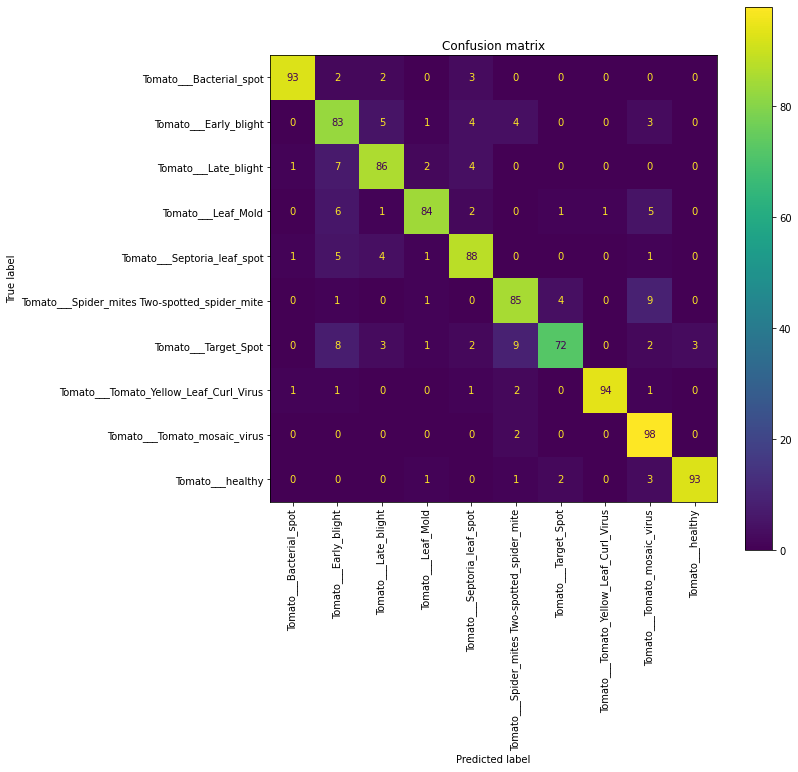

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(test_labels_name, y_pred_vgg16_name)
print(cf_matrix)
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
cmp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix,display_labels=labels.values())
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Confusion matrix")
cmp.plot(ax=ax,xticks_rotation='vertical')
plt.savefig('ConfusionMatrix')


In [ ]:
x,y = test_set.next()
y=np.argmax(y,axis=1) 

In [ ]:
y_pred=vgg16_model.predict(x)

1/1 [==============================] - 0s 141ms/step


In [ ]:
y_pred_argmax=np.argmax(y_pred,axis=1) 

In [ ]:
labels = (training_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in y_pred_argmax]
print("Pred: ",pred)
y = [labels[k] for k in y]
print("True: ",y)

Pred:  ['Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___healthy', 'Tomato___healthy', 'Tomato___Tomato_mosaic_virus', 'Tomato___Early_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Early_blight', 'Tomato___Early_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___Late_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Leaf_Mold', 'Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___E

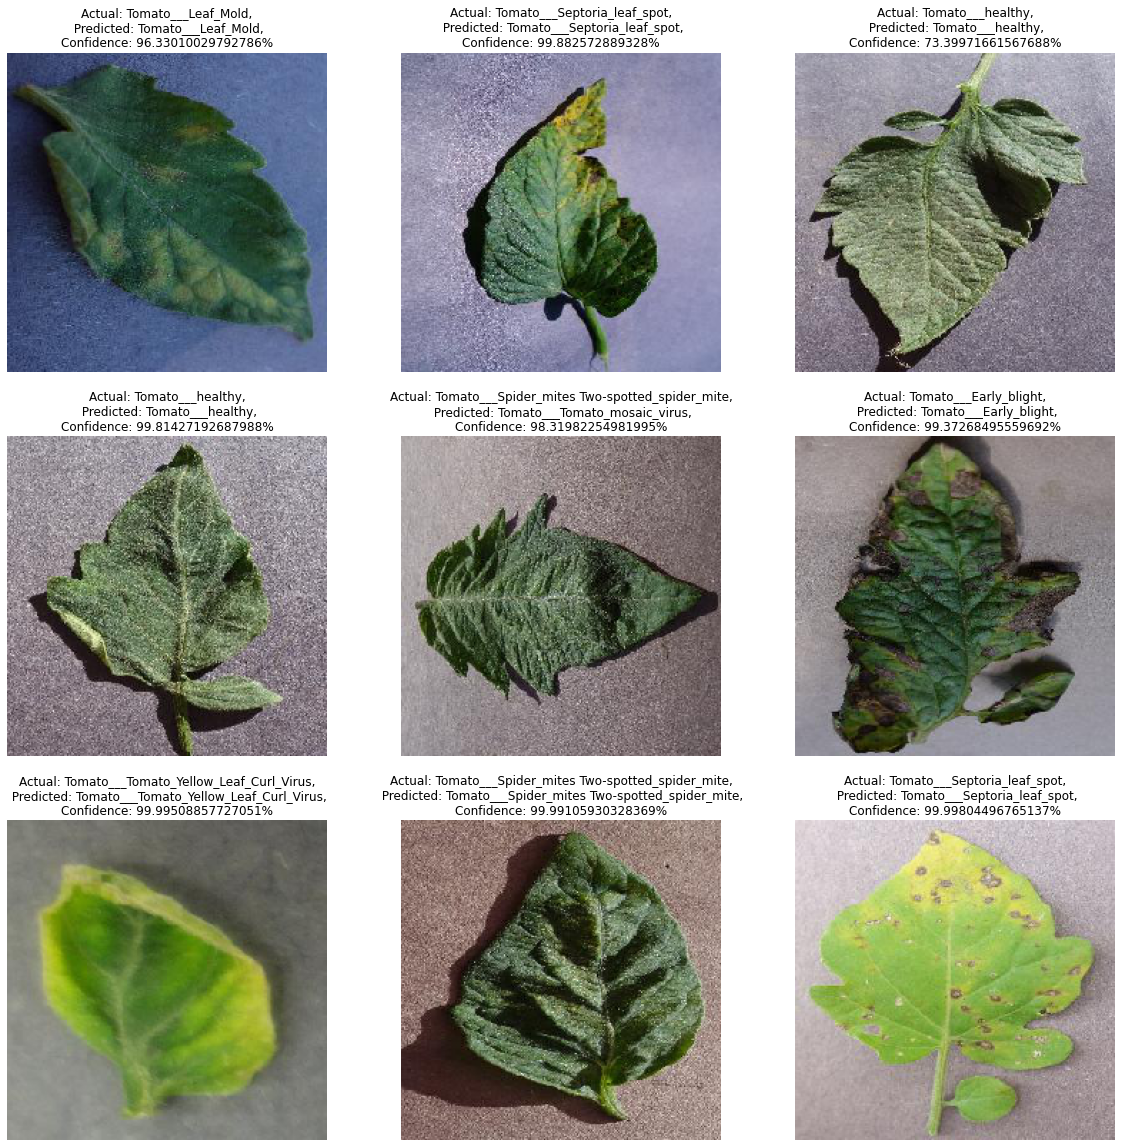

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(x[i])
  plt.title(f"Actual: {y[i]},\n Predicted: {pred[i]},\nConfidence: {100 * (np.max(y_pred[i]))}%")
  plt.axis("off")

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = keras.utils.load_img(path, target_size=(224,224))
  x = keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  preds = modelvgg16.predict(x)
  preds=np.argmax(preds, axis=1)
  preds = [labels[k] for k in preds]
  print(preds)

Saving Tomato___healthy_original_1c092a12-ed60-42c8-86b4-0427db78a5d3___RS_HL 0076.JPG_7761e96d-38f3-4b01-b520-8784552c0484.JPG to Tomato___healthy_original_1c092a12-ed60-42c8-86b4-0427db78a5d3___RS_HL 0076.JPG_7761e96d-38f3-4b01-b520-8784552c0484.JPG
1/1 [==============================] - 0s 17ms/step
['Tomato___healthy']
